In [6]:
url = "file:///D:/OneDrive%20-%20WinWire/Desktop/Guides/Student_Performance.csv"

In [8]:
import os

In [10]:
os.listdir()

['.config', 'sample_data']

In [11]:
url = 'sample_data/Student_Performance.csv'

In [13]:
import pandas as pd
df = pd.read_csv(url)

In [14]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [15]:
df.rename(
    columns={
        'Hours Studied': 'hrs_stud',
        'Previous Scores': 'prev_scores',
        'Extracurricular Activities': 'extra_act',
        'Sleep Hours': 'sleep',
        'Sample Question Papers Practiced': 'samples',
        'Performance Index': 'perf'
    },
    inplace=True
)

In [16]:
df.head()

,hrs_stud,prev_scores,extra_act,sleep,samples,perf
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
df.describe()

,hrs_stud,prev_scores,sleep,samples,perf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hrs_stud     10000 non-null  int64  
 1   prev_scores  10000 non-null  int64  
 2   extra_act    10000 non-null  object 
 3   sleep        10000 non-null  int64  
 4   samples      10000 non-null  int64  
 5   perf         10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [20]:
# turn extra_act into int from bool value

def Yes_to_int(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
      return None

In [21]:
df['extra_act'] = df['extra_act'].apply(Yes_to_int)

In [22]:
df.head()

,hrs_stud,prev_scores,extra_act,sleep,samples,perf
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [25]:
from sklearn import linear_model
import math

In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['hrs_stud', 'prev_scores', 'extra_act', 'sleep', 'samples']], df.perf)

LinearRegression()

In [27]:
print(reg.coef_)
print(reg.intercept_)

[2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]
-34.07558809191359


In [28]:
df2 = df[['hrs_stud', 'prev_scores', 'extra_act', 'sleep', 'samples']]

In [35]:
df['predicted_perf'] = reg.predict(df2)

In [41]:
df['diff_perf'] = df.perf - df.predicted_perf

In [42]:
df.head()

,hrs_stud,prev_scores,extra_act,sleep,samples,perf,predicted_perf,diff,diff_perf
0,7,99,1,9,1,91.0,91.852009,-0.852009,-0.852009
1,4,82,0,4,2,65.0,63.157787,1.842213,1.842213
2,8,51,1,7,2,45.0,45.052832,-0.052832,-0.052832
3,5,52,1,5,2,36.0,36.551201,-0.551201,-0.551201
4,7,75,0,8,5,66.0,67.091339,-1.091339,-1.091339


In [43]:
import matplotlib.pyplot as plt

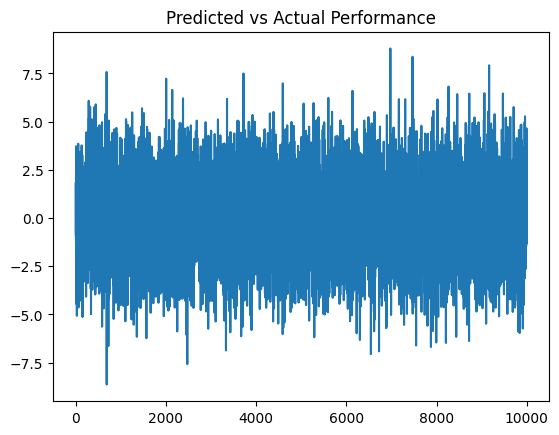

In [45]:
plt.title('Predicted vs Actual Performance')

plt.plot(df.index, df.diff_perf);

In [46]:
df.describe()

,hrs_stud,prev_scores,extra_act,sleep,samples,perf,predicted_perf,diff,diff_perf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800,55.224800,8.810730e-16,8.810730e-16
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558,19.104204,2.037588e+00,2.037588e+00
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000,12.018407,-8.633256e+00,-8.633256e+00
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000,40.240587,-1.368422e+00,-1.368422e+00
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000,55.051890,-3.107804e-02,-3.107804e-02
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000,70.510378,1.355613e+00,1.355613e+00
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000,98.434028,8.793216e+00,8.793216e+00
